In [ ]:
import pandas as pd
import re
import spacy

In [ ]:
tbbt_df = pd.read_csv('1_10_seasons_tbbt.csv')

In [ ]:
tbbt_df.head()

,episode_name,dialogue,person_scene
0,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Scene
1,Series 01 Episode 01 – Pilot Episode,So if a photon is directed through a plane wi...,Sheldon
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard
3,Series 01 Episode 01 – Pilot Episode,"There’s no point, I just think it’s a good id...",Sheldon
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard


In [ ]:
df = tbbt_df.copy()

In [ ]:
df = df.rename(columns={"person_scene": "speaker"})

In [ ]:
df.speaker = df.speaker.str.replace(r'^(\w+)\.?\)$', r'\1', regex=True)

In [ ]:
df.speaker = df.speaker.str.lower()

In [ ]:
df.speaker = df.speaker.str.replace(r'^leonard:$', 'leonard', regex=True)

In [ ]:
df.speaker = df.speaker.str.replace(r'^leonard$', 'leonard', regex=True)

In [ ]:
df.speaker = df.speaker.str.replace(r'^leoanard$', 'leonard', regex=True)

In [ ]:
df.speaker = df.speaker.str.replace(r'^howatd$', 'howard', regex=True)

In [ ]:
df.speaker = df.speaker.str.replace(r'^ra$', 'raj', regex=True)

In [ ]:
df.speaker = df.speaker.str.replace(r'^rajj$', 'raj', regex=True)

In [ ]:
df.speaker = df.speaker.str.replace(r'^rai$', 'raj', regex=True)

In [ ]:
df.speaker = df.speaker.str.replace(r'^penny\(.*\)$', 'penny', regex=True)

In [ ]:
df.speaker = df.speaker.str.replace(r'^bermadette$', 'bernadette', regex=True)

In [ ]:
df.speaker = df.speaker.str.replace(r'^sehldon$', 'sheldon', regex=True)

In [ ]:
df.speaker = df.speaker.str.replace(r'^shldon$', 'sheldon', regex=True)

In [ ]:
df.speaker = df.speaker.str.replace(r'^shedon$', 'sheldon', regex=True)

In [ ]:
df.speaker = df.speaker.str.replace(r'^sgeldon$', 'sheldon', regex=True)

In [ ]:
df.speaker = df.speaker.str.replace(r'^amy\(.*\)$', 'amy', regex=True)

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
propn_speakers = set()
for speaker in df.speaker.unique():
  doc = nlp(speaker)
  for tok in doc:
    if tok.pos_ == 'PROPN' and '(' not in speaker and ')' not in speaker:
      propn_speakers.add(speaker)

In [ ]:
main_characters = ['sheldon', 'leonard', 'penny', 'howard', 'raj', 'amy', 'bernadette']

In [ ]:
propn_speakers.update(main_characters)

In [ ]:
df = df[df.speaker.isin(propn_speakers)]

In [ ]:
df.speaker = df.speaker.apply(lambda x: 'others' if x not in main_characters else x)

In [ ]:
df.speaker = df.speaker.str.upper()

In [ ]:
df.speaker.unique()

array(['SHELDON', 'LEONARD', 'PENNY', 'HOWARD', 'RAJ', 'OTHERS',
       'BERNADETTE', 'AMY'], dtype=object)

In [ ]:
print(f'{len(df)/len(tbbt_df):%}')

85.740543%


In [ ]:
df.dialogue = df.dialogue.str.replace('\\s+\\(.*?\\)$', '', regex=True)

In [ ]:
df.dialogue = df.dialogue.str.replace('\\s+\\(.*?\\)(?=\')', '', regex=True)

In [ ]:
df.dialogue = df.dialogue.str.replace(r'\s+\(.*?\)(?=\.)', '', regex=True)

In [ ]:
df.dialogue = df.dialogue.str.replace(r'\s+\(.*?\)(?=\?)', '', regex=True)

In [ ]:
df.dialogue = df.dialogue.str.replace(r'\s+\(.*?\)(?=")', '', regex=True)

In [ ]:
df.dialogue = df.dialogue.str.replace(r'\s+\(.*?\)(?=,)', '', regex=True)

In [ ]:
df.dialogue = df.dialogue.str.replace(r'\s+\(.*?\)(?=:)', '', regex=True)

In [ ]:
df.dialogue = df.dialogue.str.replace(r'\s+\(.*?\)(?=;)', '', regex=True)

In [ ]:
df.dialogue = df.dialogue.str.replace(r'\s+\(.*?\)(?=…)', '', regex=True)

In [ ]:
df.dialogue = df.dialogue.str.replace('^\(.*?\)\s*', '', regex=True)

In [ ]:
df.dialogue = df.dialogue.str.replace(r'^(?<=")\(.*?\)\s*', '', regex=True)

In [ ]:
df.dialogue = df.dialogue.str.replace('^(?<=\')\\(.*?\\)\\s*', '', regex=True)

In [ ]:
df.dialogue = df.dialogue.str.replace(r'\(.*?\)\s+', ' ', regex=True)

In [ ]:
df.dialogue = df.dialogue.str.replace(r'\(.*?\)$', '', regex=True)

In [ ]:
df.dialogue = df.dialogue.str.replace(r'\s+\(.*?\)', ' ', regex=True)

In [ ]:
df.dialogue = df.dialogue.str.replace(r'\s+\(.*?\)\s+', ' ', regex=True)

In [ ]:
df.dialogue = df.dialogue.str.replace(r'\s+\(.*$', '', regex=True)

In [ ]:
df.dialogue = df.dialogue.str.replace(r' Iskip\)', '', regex=True)

In [ ]:
df.dialogue = df.dialogue.str.replace(r'in the middle of \}', '', regex=True)

In [ ]:
df.dialogue = df.dialogue.str.strip()

In [ ]:
df = df[~df.dialogue.isnull()]

In [ ]:
df = df[(df.dialogue.str.contains(r'\w', regex=True))]

In [ ]:
df['season'] = df.episode_name.apply(lambda x: int(re.match(r'Series (\d{2}) Episode', x).group(1)))

In [ ]:
df['episode'] = df.episode_name.apply(lambda x: int(re.match(r'Series \d{2} Episode (\d{2})', x).group(1)))

In [ ]:
df.episode_name = df.episode_name.apply(lambda x: re.match(r'^Series \d{2} Episode \d{2} [-–][ ]?(.*)$', x).group(1))

In [ ]:
df[['season', 'episode', 'episode_name', 'speaker', 'dialogue']].to_csv('tbbt_1_10_w_others.csv', index=False)

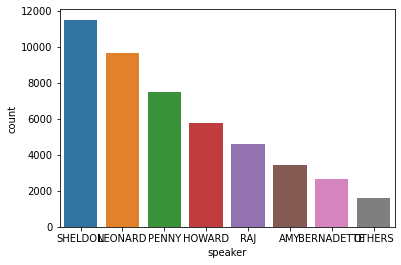

In [ ]:
ax = sns.countplot(x=df.speaker,
                   order=df.speaker.value_counts(ascending=False).index);